In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

   Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic     NaN     Tropical Atlantic   
1    Pacific     NaN  Eastern Indo-Pacific   
2   Atlantic     NaN     Tropical Atlantic   
3   Atlantic     NaN     Tropical Atlantic   
4   Atlantic     NaN     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdo


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


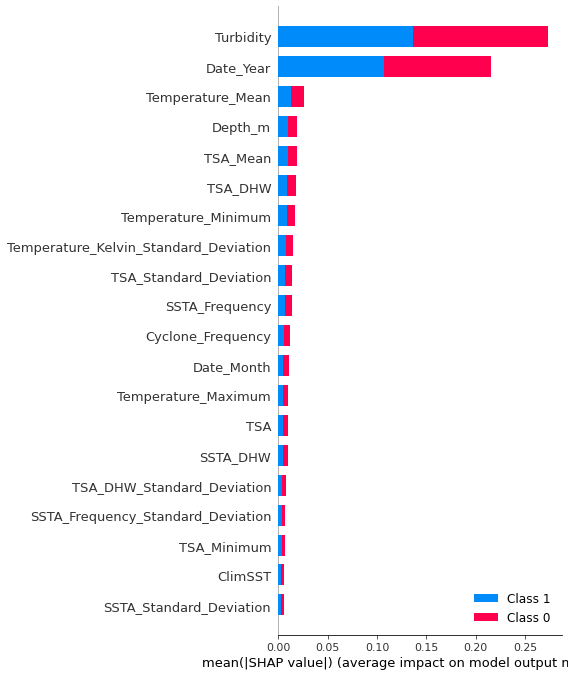

In [ ]:
df = pd.read_csv('~/Data_Science/V2-global-bleaching-and-environmental-data.csv', na_values = 'nd')

print(df.head())
print(list(df.columns))

df['label'] = 1
df['label'][df['Percent_Bleaching'] < 50.0] = 0

# Drop four columns from the end except label as they are character columns
df.drop(['Date', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments'], axis = 1, inplace = True)

# Drop columns from Site_ID to Site_Name (i.e. from the begin of the dataframe) as they are character columns
df.drop(df.loc[:, 'Site_ID':'Site_Name'], axis = 1, inplace = True)

# Drop Exposure, Substrate_Name and Bleaching_Level since they are character columns
df.drop(['Exposure', 'Substrate_Name', 'Bleaching_Level'], axis = 1, inplace = True)

# Drop Percent_Bleaching as it is not needed since label is being computed from Percent_Bleaching
df.drop(['Percent_Bleaching'], axis = 1, inplace = True)

# Drop all rows with NaN values
df1 = df.dropna()

X = df1.iloc[:, :-1]
y = df1['label']

clf = RandomForestClassifier(n_estimators=500, random_state=41)
clf.fit(X,y)

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])